# RNN-LSTM Subgenre Music Classification

## Mount Drive

In [22]:
# This is to mount your Google Drive to Colab to read in the data
# from google.colab import drive
# drive.mount("/content/drive")

# It's recommended to run these models on a local machine with a decent CPU/GPU if possible; both the CNN and LSTM model take several hours to train in Colab

## Import Libraries

In [23]:
import json
import keras
import math
import numpy as np
import pandas as pd

# Used for implementing RNN-LSTM model
from keras.layers import LSTM, Dense, Dropout

# Used for plotting accuracy/loss and confusion matrix
import matplotlib.pyplot as plt
import seaborn

## Setting up the Data

In [24]:
# Original File
# FILE_NAME = "mfcc20_NS10_D30_RNN-LSTM.json"

# Change the PATH to wherever you plan on having the data
PATH = "./Datasets/MFCCs/"
FILE_NAME = "mfcc30_NS30_D30_RNN-LSTM.json"

with open(PATH + FILE_NAME, "r") as fp:
  data = json.load(fp)

X = np.array(data["mfcc"])
y = np.array(data["labels"])
genres = np.unique(y)

In [25]:
print(X.shape)
print(y.shape)
print(genres)

(67740, 44, 30)
(67740,)
['BigRoom' 'Breaks' 'Dance' 'DeepHouse' 'DrumAndBass' 'Dubstep'
 'ElectroHouse' 'ElectronicaDowntempo' 'FunkRAndB' 'FutureHouse'
 'GlitchHop' 'HardDance' 'HardcoreHardTechno' 'HipHop' 'House'
 'IndieDanceNuDisco' 'Minimal' 'ProgressiveHouse' 'PsyTrance' 'ReggaeDub'
 'TechHouse' 'Techno' 'Trance']


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)

(54192, 44, 30)
(54192,)
(44, 30)


## Creating the Neural Network

In [27]:
# Build network topology
model = keras.Sequential()

# 3 LSTM layers
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(LSTM(64))

# Dense layer
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(23, activation="softmax"))

# Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 44, 64)            24320     
_________________________________________________________________
lstm_7 (LSTM)                (None, 44, 64)            33024     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 23)                1495      
Total params: 96,023
Trainable params: 96,023
Non-trainable params: 0
__________________________________________________

## Training the Model

In [28]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
1694/1694 [==============================] - 23s 9ms/step - loss: 2.7793 - accuracy: 0.1530
Epoch 2/30
1694/1694 [==============================] - 14s 8ms/step - loss: 2.3180 - accuracy: 0.2943
Epoch 3/30
1694/1694 [==============================] - 14s 8ms/step - loss: 2.1261 - accuracy: 0.3504
Epoch 4/30
1694/1694 [==============================] - 14s 8ms/step - loss: 1.9851 - accuracy: 0.3921
Epoch 5/30
1694/1694 [==============================] - 14s 8ms/step - loss: 1.8875 - accuracy: 0.4206
Epoch 6/30
1694/1694 [==============================] - 14s 8ms/step - loss: 1.8023 - accuracy: 0.4498 1s - loss: 1.8031 - accuracy: 0. - ETA: 
Epoch 7/30
1694/1694 [==============================] - 14s 8ms/step - loss: 1.7111 - accuracy: 0.4736
Epoch 8/30
1694/1694 [==============================] - 14s 8ms/step - loss: 1.6464 - accuracy: 0.4965
Epoch 9/30
1694/1694 [==============================] - 14s 8ms/step - loss: 1.5661 - accuracy: 0.5202
Epoch 10/30
1694/1694 [=========

## Checking the Results

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)

424/424 [==============================] - 3s 5ms/step - loss: 1.6432 - accuracy: 0.5619


In [30]:
print("test_acc: ",test_acc)

test_acc:  0.5618541240692139


## Lets try Validation

In [31]:
val_size = math.ceil(len(X_train) * 0.2)

x_val = X_train[:val_size]
partial_x_train = X_train[val_size:]

y_val = y_train[:val_size]
partial_y_train = y_train[val_size:]

In [32]:
# Build network topology
model = keras.Sequential()

# 3 LSTM layers
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(LSTM(64))

# Dense layer
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(23, activation="softmax"))

# Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
          partial_y_train,
          batch_size=32,
          epochs=30,
          validation_data=(x_val, y_val))

results = model.evaluate(X_test, y_test)

Epoch 1/30
1355/1355 [==============================] - 18s 11ms/step - loss: 2.8099 - accuracy: 0.1483 - val_loss: 2.4321 - val_accuracy: 0.2635
Epoch 2/30
1355/1355 [==============================] - 13s 10ms/step - loss: 2.3864 - accuracy: 0.2731 - val_loss: 2.2622 - val_accuracy: 0.3081
Epoch 3/30
1355/1355 [==============================] - 14s 10ms/step - loss: 2.2038 - accuracy: 0.3249 - val_loss: 2.1685 - val_accuracy: 0.3396
Epoch 4/30
1355/1355 [==============================] - 13s 10ms/step - loss: 2.0844 - accuracy: 0.3596 - val_loss: 2.0352 - val_accuracy: 0.3788  - E - ETA:  - ETA - ETA: 4s - loss:
Epoch 5/30
1355/1355 [==============================] - 13s 10ms/step - loss: 1.9712 - accuracy: 0.3949 - val_loss: 1.9691 - val_accuracy: 0.3969
Epoch 6/30
1355/1355 [==============================] - 13s 10ms/step - loss: 1.8868 - accuracy: 0.4188 - val_loss: 1.9351 - val_accuracy: 0.4101
Epoch 7/30
1355/1355 [==============================] - 14s 10ms/step - loss: 1.8053 - 

In [33]:
results

[1.8183518648147583, 0.5241364240646362]

## Comparing the Loss and Accuracy with the Training and Validation Data

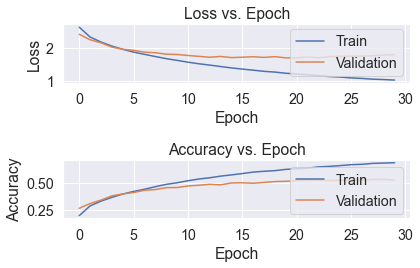

In [34]:
# Plot loss during training
plt.subplot(211)
plt.title("Loss vs. Epoch")
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot accuracy during training
plt.subplot(212)
plt.title("Accuracy vs. Epoch")
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

## Accuracy, Precision, Recall, AUC, and Confusion Matrix

In [35]:
y_prob = model.predict(X_test, verbose=0)
y_classes = model.predict_classes(X_test, verbose=0)
print(y_prob)
print(y_classes)

e:\documents\siue\cs-590-001 - deep learning\project_venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[2.62064327e-06 2.40600645e-03 4.77416677e-07 ... 9.24134937e-08
  5.53933376e-07 7.73540698e-09]
 [6.62132926e-09 1.21067678e-05 4.91845697e-07 ... 1.57887257e-07
  2.69393195e-06 9.44324867e-08]
 [3.67409179e-08 3.64505638e-07 2.22018943e-03 ... 9.13733523e-03
  1.03330601e-03 1.34907155e-10]
 ...
 [7.10257232e-01 1.14984985e-03 3.83758619e-02 ... 6.10257084e-05
  1.09411245e-04 8.54361057e-03]
 [3.70165149e-11 5.42658427e-06 2.82892955e-07 ... 1.98630849e-03
  1.76208152e-06 7.03019931e-14]
 [1.80813283e-01 6.71057589e-03 2.63295975e-03 ... 8.66423288e-05
  1.25955630e-04 2.16480374e-01]]
[ 4 16  3 ...  0 16  5]


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_classes)
print(f"Accuracy: {accuracy}")

# Precision tp / (tp + fp)
precision = precision_score(y_test, y_classes, average="macro")
print(f"Precision: {precision}")

# Recall: tp / (tp + fn)
recall = recall_score(y_test, y_classes, average="macro")
print(f"Recall: {recall}")

Accuracy: 0.5241364038972542
Precision: 0.5254220080503385
Recall: 0.5227167237311235


In [37]:
# ROC AUC
auc = roc_auc_score(y_test, y_prob, multi_class="ovo")
print(f"ROC AUC: {auc}")

# Confusion matrix
matrix = confusion_matrix(y_test, y_classes)
print(matrix)

ROC AUC: 0.917516585163491
[[239  14  12   5   4  18  43   4   2  24  21  48   3  31  10   2   4  16
    9   5   0   1  77]
 [ 18 222   7  10  15  21  26  15   4  14  39  13   8  34  10   8   9   7
   13  23   8  12   7]
 [ 33  12 179  19   1   8  19   6  28  50  19  23   1  25  34   9   9  30
    8  29   3   6  28]
 [  0   2   8 376   0   0   6  46   8   3   0   4   5   1   6  11  47  50
    3  15   7  14  12]
 [ 13  53   1   1 375  22  15   7   1   6  22   6   2  18   6   0   2   3
    5  10   0   4  13]
 [ 29  33   3   5  20 255  21   4   7   7  27  25   3  89   8   4   6   4
    4  11   2   6  25]
 [ 69  16   9   6  11  28 146   7   6  39  30  22   3  77  17   4   5   7
   16  13   7   5  56]
 [ 12  15   5  38   1   3   4 296  17   6  14  10   6  10   4  32  22  25
   14  17   4  12  31]
 [  6   9  22   9   3   2   2  10 363   5  13   3   1   0  22  52   5  11
    0  24   5   0   7]
 [ 47  14  50  13   8   7  43  10   7 197  14  11   1  16  35   6   9  20
   10  15  17  16  19]
 [ 

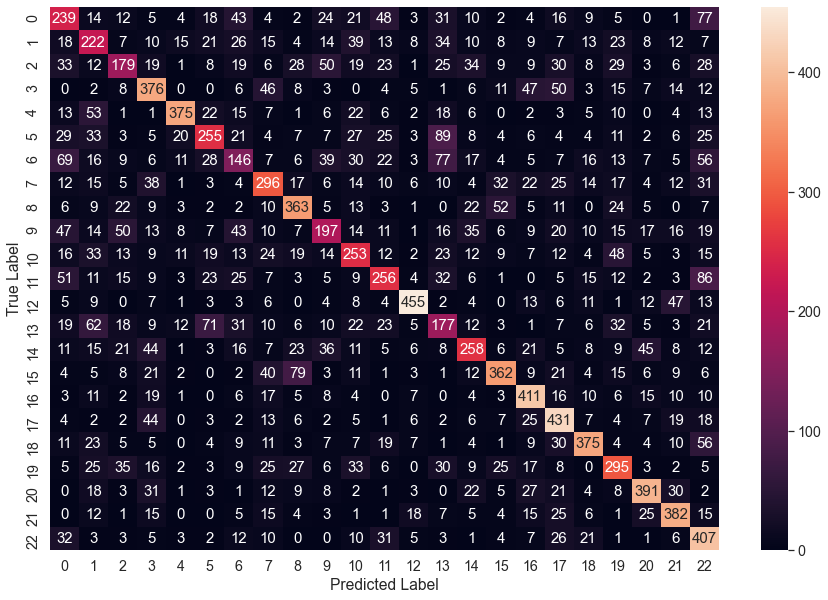

In [38]:
df_cm = pd.DataFrame(matrix, range(23), range(23))
plot = plt.figure(figsize=(15,10))
seaborn.set(font_scale=1.3) # for label size
seaborn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt="d")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

In [39]:
# Genres are encoded as integers based on alphabetical order
print({encoder.transform([genre])[0]:genre for genre in genres})

{0: 'BigRoom', 1: 'Breaks', 2: 'Dance', 3: 'DeepHouse', 4: 'DrumAndBass', 5: 'Dubstep', 6: 'ElectroHouse', 7: 'ElectronicaDowntempo', 8: 'FunkRAndB', 9: 'FutureHouse', 10: 'GlitchHop', 11: 'HardDance', 12: 'HardcoreHardTechno', 13: 'HipHop', 14: 'House', 15: 'IndieDanceNuDisco', 16: 'Minimal', 17: 'ProgressiveHouse', 18: 'PsyTrance', 19: 'ReggaeDub', 20: 'TechHouse', 21: 'Techno', 22: 'Trance'}
